In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
print(sns.__version__)

0.9.1


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
base = 'ks193'
path_front = 'expression/'
path_rear = '_5map_gene_expression_BOTH.csv'

file_path = path_front+base+path_rear
column_set= pd.MultiIndex.from_product([[base],['reads','rpc','rpkm']])

column_set = []
for result_type in ['reads','rpc','rpkm']:
    column_set.append(base+'_'+result_type)
    
df_base = DataFrame.from_csv(file_path)
df_base.columns = column_set

##############
##############

files = ['ks' + str(x) for x in range(195,196)]
path_front = 'expression/'
path_rear = '_5map_gene_expression_BOTH.csv'

for f in files:
    column_set= pd.MultiIndex.from_product([[f],['reads','rpc','rpkm']])
    
    column_set = []
    for result_type in ['reads','rpc','rpkm']:
        column_set.append(f+'_'+result_type)
    
    df = DataFrame.from_csv(path_front+f+path_rear)
    df.columns = column_set
    df_base = pd.concat([df_base,df],axis=1)
    
df_base.reset_index(inplace = True)

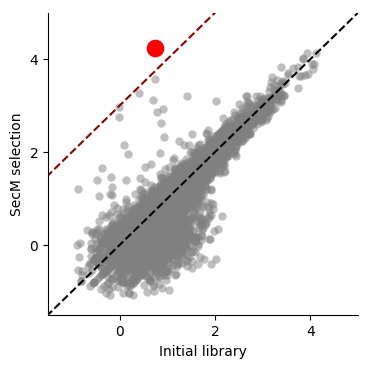

In [5]:
x_data = 'ks193_rpkm'
y_data = 'ks195_rpkm'
dotcolor = 'grey'
dotcolor_hits = 'red'

fig, ax = plt.subplots()
fig.set_dpi(100)
fig.set_size_inches(4, 4) 

kwargs  =   {'edgecolor':"r", 
            'linewidth':0, 
            'linestyle':'-', 
            'alpha':0.5
            }
ax = sns.scatterplot(x=df_base[x_data].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_base[y_data].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 color=dotcolor,
                **kwargs)

kwargs  =   {'edgecolor':"red", 
            'linewidth':2.7, 
            'linestyle':'-', 
            'alpha':1.0,
             's':100
            }
genes = ['smrB']
hits = df_base['index'].isin(genes)
ax = sns.scatterplot(x=df_base[hits][x_data].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_base[hits][y_data].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 color=dotcolor_hits,
                **kwargs)

ax.set_xlim(-1.5,5)
ax.set_ylim(-1.5,5)
ax.set_xticks([0,2,4])
ax.set_yticks([0,2,4])
ax.set_xlabel('Initial library')
ax.set_ylabel('SecM selection')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

x = np.linspace(-5,5,100)
plt.plot(x, x, '--',color='black')
plt.plot(x, x+3, '--',color='darkred')

print